In [6]:
import pandas as pd

def create_adj(keywords):
    display(keywords)
    
    return

keywords=pd.read_csv("keyword_data.csv", encoding_errors='ignore')
keywords=keywords.dropna(how='all')

create_adj(keywords)

,Title,Keyword 1,Keyword 2,Keyword 3,Keyword 4,Keyword 5,Keyword 6,Keyword 7,Keyword 8,Keyword 9,Keyword 10,Keyword 11,Keyword 12,Date
2,Meta-Analyses of Financial Performance and Equ...,EQUITY,ORGANIZATIONAL sociology,PERFORMANCE,META-analysis,PSYCHOMETRICS,ORGANIZATIONAL research,FINANCIAL performance,AGENCY theory,ORGANIZATIONAL effectiveness,ORGANIZATIONAL behavior,CORPORATE governance,NaN,3-Feb
3,"Home Country Environments, Corporate Diversifi...",DIVERSIFICATION in industry,BUSINESS planning,PERFORMANCE standards,EMPLOYEES -- Rating of,CORPORATE culture,STRATEGIC planning,ORGANIZATIONAL effectiveness,MANAGEMENT science,MANAGEMENT research,PRODUCT management,NaN,NaN,3-Feb
4,Safeguarding Investments in Asymmetric Interor...,INTERORGANIZATIONAL relations,INTERGROUP relations,BUSINESS communication,INVESTMENTS,SUPPLY chains,KNOWLEDGE management,INTERORGANIZATIONAL networks,CORPORATE governance,GROUP decision making,INTELLECTUAL capital,NaN,NaN,3-Feb
5,Managerialist and Human Capital Explanations f...,EXECUTIVE compensation,WAGES,HUMAN capital,LABOR economics,PERSONNEL management,MANAGEMENT science,CONTINGENCY theory (Management),COMPENSATION management,EXECUTIVE ability (Management),CORPORATE governance,NaN,NaN,3-Feb
6,Bidding Wars Over R&D-Intensive Firms: Knowled...,KNOWLEDGE management,INFORMATION resources management,MANAGEMENT information systems,BREAK-even analysis,DATA mining,MANAGEMENT science,RESEARCH & development,RESEARCH & development contracts,CORPORATE governance,DECISION making,ORGANIZATIONAL behavior,TRANSACTION costs,3-Feb
7,When EEThe Show Must Go OnEE: Surface Acting a...,EMOTIONS (Psychology),INTERPERSONAL relations,STRESS (Psychology),SOCIAL interaction,SOCIAL psychology,EMPLOYEES -- Attitudes,CUSTOMER services,CUSTOMER satisfaction,JOB stress,PEER review (Professional performance),NaN,NaN,3-Feb
8,Relationships among Supervisors' and Subordina...,SUPERVISORS,JUSTICE,CONFLICT management,MEDIATION,EMPLOYEES,INDUSTRIAL relations,ORGANIZATIONAL behavior,UNITED States -- National Guard,ORGANIZATIONAL effectiveness,DECISION making,RESOURCE allocation,NaN,3-Feb
9,Punctuated Equilibrium and Linear Progression:...,INDUSTRIAL relations,MANAGEMENT science,DECISION theory,ORGANIZATIONAL sociology,PUNCTUATED equilibrium (Evolution),ORGANIZATIONAL change,ORGANIZATIONAL behavior,ORGANIZATIONAL structure,BUSINESS models,ORGANIZATIONAL research,NaN,NaN,3-Feb
13,The Relationship between Overconfidence and th...,DECISION making,EXECUTIVES,INDUSTRIAL management,NEW products,HIGH technology industries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3-Apr
14,Governance Through Ownership: Centuries of Pra...,CORPORATE governance,INDUSTRIAL management,STOCKHOLDERS wealth,INSTITUTIONAL investors,WAGES,NEW products,ORGANIZATIONAL structure,ORGANIZATIONAL behavior,DECENTRALIZATION in management,ORGANIZATIONAL effectiveness,NaN,NaN,3-Apr


,word,frequency
43,many,3
182,Voltaire,2
150,Harris,2
40,lot,2
101,better,2
46,need,2
144,death,2
115,thoughts,2
2,know,2
158,good,2


<AxesSubplot:xlabel='frequency', ylabel='word'>

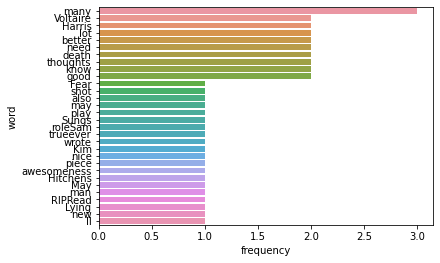

In [1]:

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns
import re
import string
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
def create_word_frequency(tweetfile):
    stop_words=set(stopwords.words('english'))
    entire_stopword=""

    for i in range(len(tweetfile)):
        tweetfile["tweet"][i]= re.sub(r"(?:\@|https?\://)\S+", '', tweetfile["tweet"][i])
        tweetfile["tweet"][i]= re.sub(r'[^\w\s]', '', tweetfile["tweet"][i])
        word_tokens=word_tokenize(tweetfile["tweet"][i])
        nostop=[w for w in word_tokens if not w.lower() in stop_words]
        tweetfile["tweet"][i]=' '.join(nostop)
        entire_stopword+=tweetfile["tweet"][i]
    entire_stopword=entire_stopword.translate(str.maketrans('','',string.punctuation))
    counted = Counter(entire_stopword.split())

    word_freq = pd.DataFrame(counted.items(),columns=['word','frequency']).sort_values(by='frequency',ascending=False)
    
    return word_freq

display(create_word_frequency(pd.read_csv("tweets/2011.csv")).head(10))
elon_2011=create_word_frequency(pd.read_csv("tweets/2011.csv"))
sns.barplot(x='frequency',y='word',data=elon_2011.head(30))

,word,frequency
45,s,35
42,Model,27
41,Tesla,25
9,rocket,24
102,nt,19
20,SpaceX,15
443,Dragon,15
322,amp,14
58,Space,14
223,good,13


<AxesSubplot:xlabel='frequency', ylabel='word'>

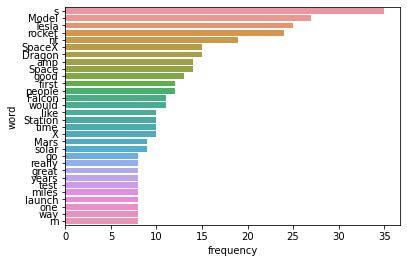

In [8]:
display(create_word_frequency(pd.read_csv("tweets/2012.csv")).head(10))
elon_2012=create_word_frequency(pd.read_csv("tweets/2012.csv"))
sns.barplot(x='frequency',y='word',data=elon_2012.head(30))

,word,frequency
130,Tesla,86
55,Model,56
161,amp,56
4,s,55
32,rocket,51
120,nt,45
46,good,34
98,like,32
61,w,28
385,Dragon,27


<AxesSubplot:xlabel='frequency', ylabel='word'>

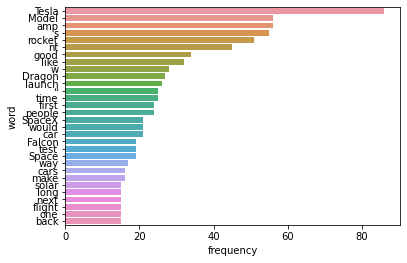

In [9]:
display(create_word_frequency(pd.read_csv("tweets/2013.csv")).head(10))
elon=create_word_frequency(pd.read_csv("tweets/2013.csv"))
sns.barplot(x='frequency',y='word',data=elon.head(30))

,word,frequency
52,Tesla,112
132,amp,72
282,Model,68
89,s,62
159,rocket,59
34,nt,54
555,good,42
37,like,40
98,Dragon,37
69,launch,35


<AxesSubplot:xlabel='frequency', ylabel='word'>

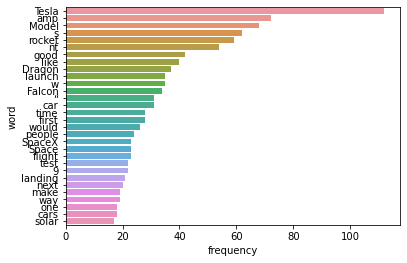

In [10]:
display(create_word_frequency(pd.read_csv("tweets/2014.csv")).head(10))
elon=create_word_frequency(pd.read_csv("tweets/2014.csv"))
sns.barplot(x='frequency',y='word',data=elon.head(30))

,word,frequency
66,Tesla,132
27,amp,90
288,s,83
290,Model,80
61,rocket,77
311,nt,69
50,good,59
399,like,51
60,launch,47
680,Dragon,45


<AxesSubplot:xlabel='frequency', ylabel='word'>

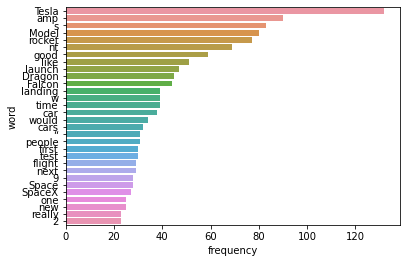

In [11]:
display(create_word_frequency(pd.read_csv("tweets/2015.csv")).head(10))
elon=create_word_frequency(pd.read_csv("tweets/2015.csv"))
sns.barplot(x='frequency',y='word',data=elon.head(30))

,word,frequency
385,Tesla,195
351,amp,129
13,nt,127
24,s,123
92,Model,118
214,rocket,93
43,like,84
1243,good,80
63,car,58
1128,Falcon,57


<AxesSubplot:xlabel='frequency', ylabel='word'>

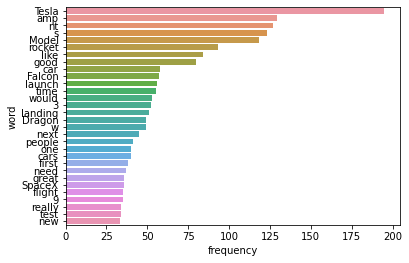

In [12]:
display(create_word_frequency(pd.read_csv("tweets/2016.csv")).head(10))
elon=create_word_frequency(pd.read_csv("tweets/2016.csv"))
sns.barplot(x='frequency',y='word',data=elon.head(30))

,word,frequency
103,Tesla,256
116,amp,219
829,s,213
794,nt,206
54,Model,168
35,like,131
187,rocket,120
63,good,106
55,3,90
488,car,89


<AxesSubplot:xlabel='frequency', ylabel='word'>

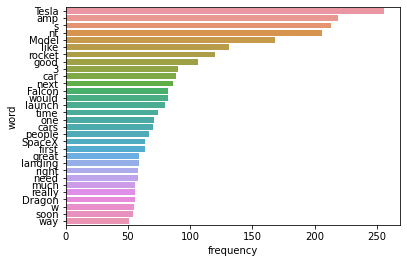

In [13]:
display(create_word_frequency(pd.read_csv("tweets/2017.csv")).head(10))
elon=create_word_frequency(pd.read_csv("tweets/2017.csv"))
sns.barplot(x='frequency',y='word',data=elon.head(30))

,word,frequency
17,amp,522
1,Tesla,228
102,car,101
124,3,97
90,like,83
123,Model,82
589,people,57
277,would,56
799,make,55
53,next,53


<AxesSubplot:xlabel='frequency', ylabel='word'>

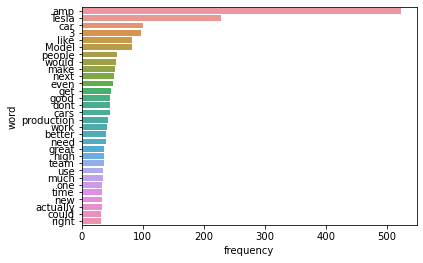

In [3]:

elon=create_word_frequency(pd.read_csv("tweets/2018.csv"))
display(elon.head(10))
sns.barplot(x='frequency',y='word',data=elon.head(30))

In [ ]:

elon=create_word_frequency(pd.read_csv("tweets/2019.csv"))
display(elon.head(10))
sns.barplot(x='frequency',y='word',data=elon.head(30))

In [ ]:

elon=create_word_frequency(pd.read_csv("tweets/2020.csv"))
display(elon.head(10))
sns.barplot(x='frequency',y='word',data=elon.head(30))

In [ ]:

elon=create_word_frequency(pd.read_csv("tweets/2021.csv"))
display(elon.head(10))
sns.barplot(x='frequency',y='word',data=elon.head(30))

In [ ]:

elon=create_word_frequency(pd.read_csv("tweets/2022.csv"))
display(elon.head(10))
sns.barplot(x='frequency',y='word',data=elon.head(30))